In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


In [49]:
file_path = '/Users/noahbucher/Documents_local/Plant_reconstruction/ppheno/data/GT_growth/plant-db_730-826.csv'
data = pd.read_csv(file_path, delimiter=';')
# delete columns with only NaN values
data = data.dropna(axis=1, how='all')
print(data.head())

       Date Row  Plant_Number Height  Leaf Count Width  Flower Count
0  30.07.24   A           1.0      4         5.0    18           0.0
1  30.07.24   A           2.0     11         6.0    14           0.0
2  30.07.24   A           3.0      7         6.0    11           0.0
3  30.07.24   A           4.0      6         6.0    16           0.0
4  30.07.24   A           5.0     11         7.0    15           0.0


In [42]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d.%m.%y')

# Set the first date as day 1
first_date = data['Date'].min()
data['Day'] = (data['Date'] - first_date).dt.days  # Start with Day 1
print(data.head())

        Date Row  Plant_Number Height  Leaf Count Width  Flower Count  Day
0 2024-07-30   A           1.0      4         5.0    18           0.0  0.0
1 2024-07-30   A           2.0     11         6.0    14           0.0  0.0
2 2024-07-30   A           3.0      7         6.0    11           0.0  0.0
3 2024-07-30   A           4.0      6         6.0    16           0.0  0.0
4 2024-07-30   A           5.0     11         7.0    15           0.0  0.0


In [43]:
# Convert 'Height' from cm to meters
data['Height'] = pd.to_numeric(data['Height'], errors='coerce')
data['Height_m'] = data['Height'] / 100
print(data.head())

        Date Row  Plant_Number  Height  Leaf Count Width  Flower Count  Day  \
0 2024-07-30   A           1.0     4.0         5.0    18           0.0  0.0   
1 2024-07-30   A           2.0    11.0         6.0    14           0.0  0.0   
2 2024-07-30   A           3.0     7.0         6.0    11           0.0  0.0   
3 2024-07-30   A           4.0     6.0         6.0    16           0.0  0.0   
4 2024-07-30   A           5.0    11.0         7.0    15           0.0  0.0   

   Height_m  
0      0.04  
1      0.11  
2      0.07  
3      0.06  
4      0.11  


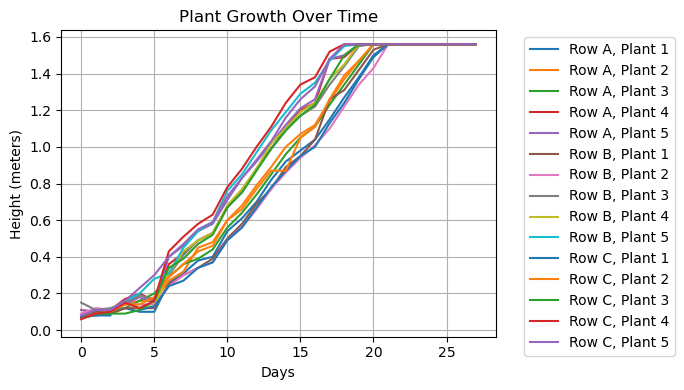

In [44]:
# Create a figure for the plot
plt.figure(figsize=(7, 4))

# Group the data by 'Row' and 'Plant_Number' to plot each plant separately
for (row, plant_number), group in data.groupby(['Row', 'Plant_Number']):
    plt.plot(group['Day'], group['Height_m'], label=f'Row {row}, Plant {int(plant_number)}')

# Customize the plot
plt.xlabel('Days')
plt.ylabel('Height (meters)')
plt.title('Plant Growth Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


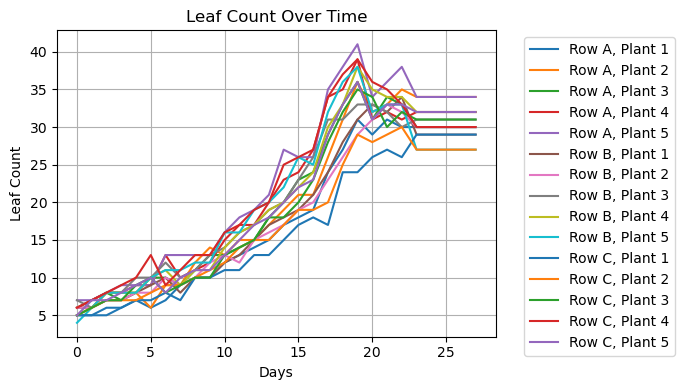

In [45]:
# Create a figure for the Leaf Count plot
plt.figure(figsize=(7, 4))

# Group the data by 'Row' and 'Plant_Number' to plot each plant's Leaf Count separately
for (row, plant_number), group in data.groupby(['Row', 'Plant_Number']):
    plt.plot(group['Day'], group['Leaf Count'], label=f'Row {row}, Plant {int(plant_number)}')

# Customize the plot
plt.xlabel('Days')
plt.ylabel('Leaf Count')
plt.title('Leaf Count Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

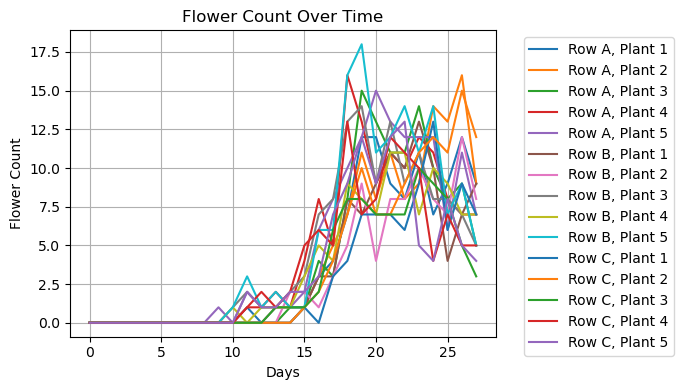

In [46]:
# Create a figure for the Flower Count plot
plt.figure(figsize=(7, 4))

# Group the data by 'Row' and 'Plant_Number' to plot each plant's Flower Count separately
for (row, plant_number), group in data.groupby(['Row', 'Plant_Number']):
    plt.plot(group['Day'], group['Flower Count'], label=f'Row {row}, Plant {int(plant_number)}')

# Customize the plot
plt.xlabel('Days')
plt.ylabel('Flower Count')
plt.title('Flower Count Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [50]:
# load csv file with volumetric growth data
file_path = '/Users/noahbucher/Documents_local/Plant_reconstruction/ppheno/data/figures/plant_volume_estimates.csv'
volume_data = pd.read_csv(file_path, delimiter=',')

# Convert the 'Date' column to datetime format
# data['Date'] = pd.to_datetime(data['Date'], format='%d.%m.%y')
# print(data.head())

In [51]:
# Calculate the number of days since the first date
# Convert the 'Date' column to datetime format
volume_data['Date'] = pd.to_datetime(data['Date'])

data['Days'] = (data['Date'] - data['Date'].min()).dt.days + 1  # Adding +1 to start from 'Day 1'

# Convert the volume to cm^3 for better readability
data['Volume (cm^3)'] = data['Volume (m^3)'] * 1e6  # 1 m^3 = 1e6 cm^3

# Plot the volumetric growth data
plt.figure(figsize=(7, 4))

# Plot the days on the x-axis and the volume in cm^3 on the y-axis
plt.plot(data['Days'], data['Volume (cm^3)'], label='Volume')

# Add labels and title
plt.xlabel('Days')
plt.ylabel('Volume (cm^3)')
plt.title('Plant Volume Over Time')

# Add a legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show grid and adjust layout
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

/var/folders/sf/4g8qf_rx2ngb3zl4xjkn4r2c0000gn/T/ipykernel_13876/2201448343.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  volume_data['Date'] = pd.to_datetime(data['Date'])


TypeError: '<=' not supported between instances of 'str' and 'float'

/var/folders/sf/4g8qf_rx2ngb3zl4xjkn4r2c0000gn/T/ipykernel_13876/4186403810.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


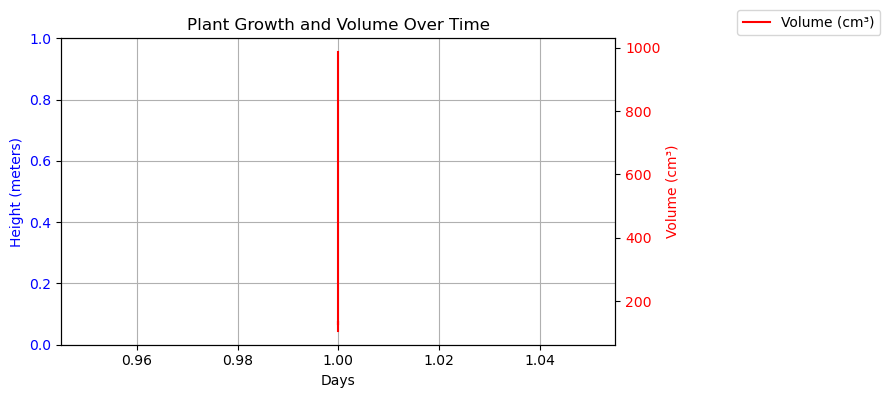

: 

In [52]:
volume_data['Date'] = pd.to_datetime(volume_data['Date'])
data['Date'] = pd.to_datetime(data['Date'])

# Calculate the number of days since the first date for both datasets
volume_data['Days'] = (volume_data['Date'] - volume_data['Date'].min()).dt.days + 1
data['Days'] = (data['Date'] - data['Date'].min()).dt.days + 1

# Convert the volume to cm^3 for better readability in 'volume_data'
volume_data['Volume (cm^3)'] = volume_data['Volume (m^3)'] * 1e6  # 1 m^3 = 1e6 cm^3

# Now let's combine the data based on the 'Days' column
# If both dataframes have the same time intervals, you can simply merge them
combined_data = pd.merge(data, volume_data[['Days', 'Volume (cm^3)']], on='Days', how='left')

# Plotting the data
fig, ax1 = plt.subplots(figsize=(7, 4))

# Plot height data (assuming you're plotting Plant C-3 or similar)
for (row, plant_number), group in combined_data.groupby(['Row', 'Plant_Number']):
    if plant_number == 'C-3':  # Filter for Plant C-3
        ax1.plot(group['Days'], group['Height_m'], label=f'Row {row}, Plant {int(plant_number)}', color='blue')

# Customize the first y-axis for height
ax1.set_xlabel('Days')
ax1.set_ylabel('Height (meters)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Plant Growth and Volume Over Time')

# Create a second y-axis for the volumetric data
ax2 = ax1.twinx()

# Plot the volumetric data for Plant C-3
ax2.plot(volume_data['Days'], volume_data['Volume (cm^3)'], label='Volume (cm³)', color='red')

# Customize the second y-axis for volume
ax2.set_ylabel('Volume (cm³)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add legends for both y-axes
fig.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show grid and adjust layout
ax1.grid(True)
plt.tight_layout()

# Display the plot
plt.show()